# Enigme de la porte du trésor

## Initiation du cirquit

q0 : gardien de droite
q1 : gardien de gauche
q2 : ligne de mensonge


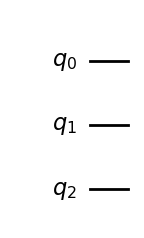

In [33]:
import numpy as np
from qiskit import *
circ = QuantumCircuit(3)
circ.draw('mpl')

### Question : où se trouve le trésor?

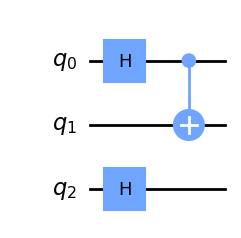

In [34]:
# On met la réponse du premier gardien en superposition (porte de Hadamard), 
# car il y a 50% de chance que le trésor se trouve derière la porte gauche et 50% de probabilité qu'il se trouve derière la porte droite
circ.h(0)
# si on ne tient pas compte des mensonges les deux gardiens vont dire la même réponse, donc on utilise une porte cnot
circ.cx(0,1)
# La ligne de mensonge est également en superposition (porte de Hadamard),
# car 50% de proba que gardien de gauche ment, et 50% de proba que le gardien de droite ment
circ.h(2)
circ.draw('mpl')

### implementation de la ligne de mensonge

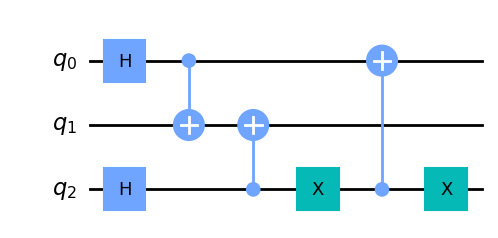

In [35]:
# si le gardien de droite ment (1), q1 doit être intriqué donc on utilise une porte CNOT 
circ.cx(2,1)
# si le gardien de gauche ment (0), 
# on a besoin d'une porte NOT pour changer le 0 qui sort de la porte de hadamard pour un 1 qui invoque la porte CNOT qui est lié au q0
circ.x(2)
circ.cx(2,0)
# on revient à la sortie de la première porte de Hadamard
circ.x(2)
circ.draw('mpl')

### Question: quelle serait la réponse de l'autre gardien si je demande quelle porte ne pas choisir ?

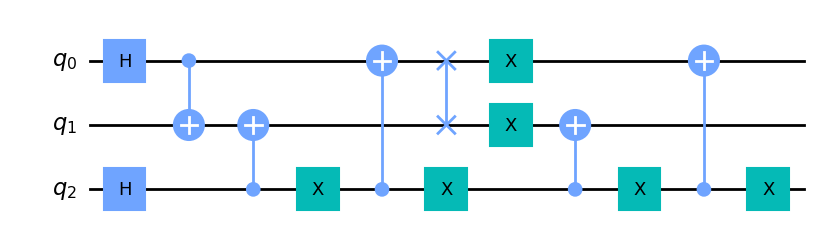

In [36]:
# on échange les réponses avec une porte de swap
circ.swap(0,1)
# on inverse les réponses avec une porte NOT
circ.x(0)
# on réimplique le méchanisme de mensonge
circ.x(1)
circ.cx(2,1)
circ.x(2)
circ.cx(2,0)
circ.x(2)
circ.draw('mpl')

In [37]:
from qiskit import Aer
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
outputstate = result.get_statevector(circ,decimals=3)
print(outputstate)

Statevector([0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j,
             0.5+0.j],
            dims=(2, 2, 2))


### On remarque que les 4 combinaisons possibles (000, 111, 011, 100) ont chacun 25% de probabilité

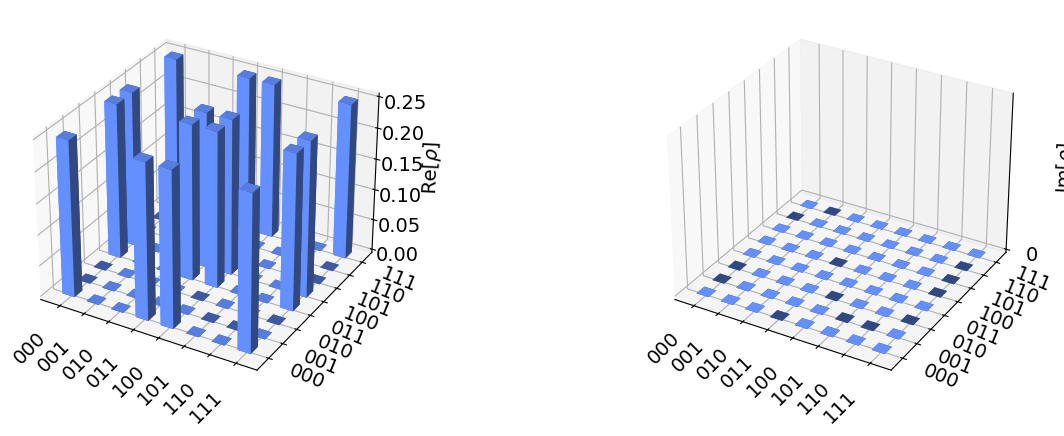

In [38]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

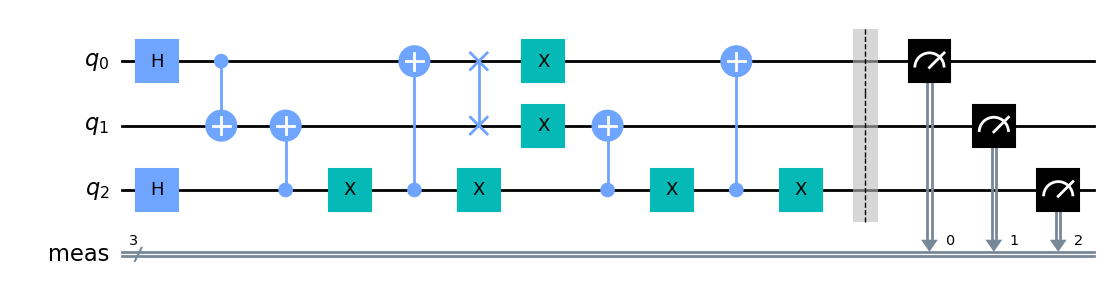

In [39]:
circ.measure_all()
circ.draw('mpl')

(array([1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

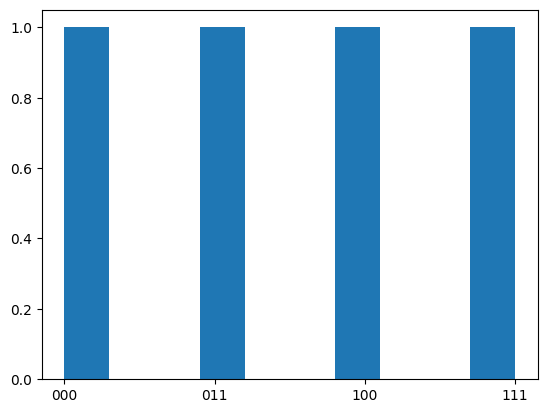

In [41]:
import matplotlib.pyplot as plt

count = result.get_counts()
plt.hist(count)